In [1]:
import mlflow
import plotly.express as px

In [2]:
mlflow_tracking_uri = 'sqlite:///ml_experiments.db'
mlflow.set_tracking_uri(mlflow_tracking_uri)
experiments = mlflow.search_experiments()
print(*experiments, sep='\n')

<Experiment: artifact_location='/home/bbelucci/code/recursive_clustering/mlruns/1', creation_time=1733929479465, experiment_id='1', last_update_time=1733929479465, lifecycle_stage='active', name='base_experiment', tags={}>
<Experiment: artifact_location='/home/bbelucci/code/recursive_clustering/mlruns/0', creation_time=1733929479458, experiment_id='0', last_update_time=1733929479458, lifecycle_stage='active', name='Default', tags={}>


In [3]:
runs = mlflow.search_runs(experiment_names=['base_experiment'])

In [4]:
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.evaluate_model_return_elapsed_time,metrics.rand_score,metrics.get_metrics_return_elapsed_time,metrics.v_measure,...,tags.child_run_id_271,tags.child_run_id_270,tags.child_run_id_229,tags.child_run_id_175,tags.child_run_id_287,tags.child_run_id_177,tags.child_run_id_121,tags.child_run_id_108,tags.child_run_id_238,tags.min_cluster_size
0,ffcc9bd4fc404209ae5dbcccdacbd04c,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2025-01-15 22:29:49.501000+00:00,2025-01-15 22:29:49.824000+00:00,0.060611,1.000000,0.000003,1.000000,...,None,None,None,None,None,None,None,None,None,None
1,69fea29278bf4afa85e6ad98e9159d7f,1,RUNNING,/home/bbelucci/code/recursive_clustering/mlrun...,2025-01-15 15:00:57.657000+00:00,NaT,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
2,0d941763624e43158bdb27bfbd395c56,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2025-01-15 11:42:45.942000+00:00,2025-01-15 11:42:47.079000+00:00,0.022778,1.000000,0.000003,1.000000,...,None,None,None,None,None,None,None,None,None,None
3,46b10cdab9a54a4f9f03fd5dd4ae9c25,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2025-01-15 11:42:27.369000+00:00,2025-01-15 11:42:28.474000+00:00,0.023539,1.000000,0.000003,1.000000,...,None,None,None,None,None,None,None,None,None,None
4,73fd04a0242444978bb967cbb3a899ba,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2025-01-15 11:42:13.210000+00:00,2025-01-15 11:42:13.447000+00:00,0.039801,1.000000,0.000003,1.000000,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,d001d87bd32f448a8653c0ab874101a7,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2024-12-11 15:04:49.274000+00:00,2024-12-11 15:04:56.098000+00:00,0.008357,0.909091,0.000004,0.666667,...,None,None,None,None,None,None,None,None,None,None
2039,0b1bd26acdb94bf4938c1adb16e9c8c8,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2024-12-11 15:04:49.255000+00:00,2024-12-11 15:04:55.776000+00:00,0.008123,0.909091,0.000003,0.666667,...,None,None,None,None,None,None,None,None,None,None
2040,78c2bc1726ee4538a5e0f5188ace8f21,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2024-12-11 15:04:49.233000+00:00,2024-12-11 15:04:55.536000+00:00,0.007855,0.909091,0.000003,0.666667,...,None,None,None,None,None,None,None,None,None,None
2041,b8d55581bddd49769132e5e4c03abbe6,1,FINISHED,/home/bbelucci/code/recursive_clustering/mlrun...,2024-12-11 15:04:49.184000+00:00,2024-12-11 15:04:55.353000+00:00,0.019326,0.909091,0.000002,0.666667,...,None,None,None,None,None,None,None,None,None,None


In [5]:
str_columns = [
    'tags.parent_run_id',
    'status',
    'start_time',
]
float_columns = [
    'metrics.rand_score',
    'metrics.mutual_info',
    'metrics.v_measure',
    'metrics.silhouette',
    'metrics.adjusted_rand',
    'metrics.homogeneity',
    'metrics.n_clusters_',
    'metrics.completeness',
    'metrics.adjusted_mutual_info',
    'metrics.best_rand_score',
    'metrics.best_mutual_info',
    'metrics.best_v_measure',
    'metrics.best_silhouette',
    'metrics.best_adjusted_rand',
    'metrics.best_homogeneity',
    'metrics.best_n_clusters_',
    'metrics.best_completeness',
    'metrics.best_adjusted_mutual_info',
    'params.repetitions',
    'params.kmeans_n_clusters',
    'params.components_size',
    'params.n_samples',
    'params.n_random',
    'params.n_informative',
    'params.class_sep',
    'params.n_classes',
    'params.min_cluster_size',
    'params.n_features',
    'params.pct_random',
]
columns = str_columns + float_columns

In [6]:
runs[float_columns] = runs[float_columns].astype(float)

In [7]:
parent_runs = runs.groupby('tags.parent_run_id').first().copy().reset_index()

In [8]:
parent_runs[columns].sort_values('start_time', ascending=False)

,tags.parent_run_id,status,start_time,metrics.rand_score,metrics.mutual_info,metrics.v_measure,metrics.silhouette,metrics.adjusted_rand,metrics.homogeneity,metrics.n_clusters_,...,params.kmeans_n_clusters,params.components_size,params.n_samples,params.n_random,params.n_informative,params.class_sep,params.n_classes,params.min_cluster_size,params.n_features,params.pct_random
0,0d10a914d0ba48feb7ec9f7bda09e080,FINISHED,2025-01-14 12:52:38.801000+00:00,0.736585,0.813132,0.635332,0.079552,0.431764,0.505227,3.0,...,2.0,27.0,1000.0,16.0,2.0,40.0,5.0,NaN,10000.0,0.0
12,a5730b796bd9422ea1623b6d0e599bcd,FINISHED,2025-01-14 12:34:56.003000+00:00,0.800803,1.609438,0.377988,-0.000427,0.000016,1.000000,999.0,...,10.0,9.0,1000.0,16.0,2.0,30.0,5.0,NaN,10000.0,0.0
2,1311b66d640249f48fd2bc8f0c5ff874,FINISHED,2025-01-14 12:24:13.462000+00:00,0.800839,1.608052,0.378896,-0.007448,0.000318,0.999139,979.0,...,8.0,14.0,1000.0,16.0,2.0,20.0,5.0,NaN,10000.0,0.0
6,6c55ced01a384ba4a375ce89cd7e4b7d,FINISHED,2025-01-14 12:17:11.854000+00:00,0.918721,1.325186,0.901205,0.120647,0.778805,0.823385,4.0,...,3.0,26.0,1000.0,16.0,2.0,50.0,5.0,NaN,10000.0,0.0
4,28dd7e4f287e444d82f6a2659633a969,FINISHED,2025-01-14 12:09:48.791000+00:00,0.801013,0.856509,0.582841,0.017844,0.473949,0.532179,5.0,...,2.0,17.0,1000.0,16.0,2.0,50.0,5.0,NaN,10000.0,0.0
15,e7194dedf12d4e728b639873f9557e93,FINISHED,2025-01-14 12:04:15.086000+00:00,0.759760,0.950271,0.742483,0.219962,0.481757,0.590436,3.0,...,2.0,17.0,1000.0,16.0,2.0,100.0,5.0,NaN,10000.0,0.0
14,d4ea4b639517400e86300f6e622d1864,FINISHED,2025-01-14 12:02:18.750000+00:00,0.919920,1.332179,0.905746,0.602651,0.781925,0.827729,4.0,...,2.0,17.0,1000.0,16.0,2.0,100.0,5.0,NaN,1000.0,0.0
3,164ccef678464a1fb555630331502e73,FINISHED,2025-01-14 11:01:41.091000+00:00,0.919920,1.332179,0.905746,0.720398,0.781925,0.827729,4.0,...,2.0,17.0,1000.0,16.0,2.0,100.0,5.0,NaN,100.0,0.0
16,f2e81dab9d0f4b1b8aeb333e01b24899,FINISHED,2024-12-12 15:01:42.840000+00:00,1.000000,1.609438,1.000000,0.497247,1.000000,1.000000,5.0,...,2.0,16.0,1000.0,0.0,10000.0,100.0,5.0,NaN,NaN,NaN
10,961c06819bea4b90b672e6d5ad66a4f3,FINISHED,2024-12-12 14:58:31.205000+00:00,1.000000,1.609438,1.000000,0.817589,1.000000,1.000000,5.0,...,5.0,26.0,1000.0,0.0,1000.0,100.0,5.0,NaN,NaN,NaN


In [9]:
recursive_clustering_dimensions = ['params.repetitions', 'params.kmeans_n_clusters', 'params.components_size', 'metrics.silhouette', 'metrics.adjusted_rand',
                                   'metrics.n_clusters_']

In [10]:
dimensions_dict = {
    'RecursiveClustering': recursive_clustering_dimensions,
}

In [12]:
parent_run_id = '6c55ced01a384ba4a375ce89cd7e4b7d'
parent_run = parent_runs.loc[parent_runs['tags.parent_run_id']==parent_run_id]
model_name = parent_run['params.model_nickname'].values[0]
n_samples = parent_run['params.n_samples'].values[0]
n_features = parent_run['params.n_features'].values[0]
pct_random = parent_run['params.pct_random'].values[0]
class_sep = parent_run['params.class_sep'].values[0]
fig_title = f'{model_name}_{n_samples}_{n_features}_{pct_random}_{class_sep}'
df = runs.loc[runs['tags.parent_run_id']==parent_run_id]
# df = df.loc[df['metrics.n_clusters_'] < 10]
fig = px.parallel_coordinates(df, dimensions=dimensions_dict[model_name], width=None, height=500, title=fig_title)
fig.show()

In [119]:
parent_run_id = '6c55ced01a384ba4a375ce89cd7e4b7d'
parent_run = parent_runs.loc[parent_runs['tags.parent_run_id']==parent_run_id]
model_name = parent_run['params.model_nickname'].values[0]
n_samples = parent_run['params.n_samples'].values[0]
n_informative = parent_run['params.n_informative'].values[0]
n_random = parent_run['params.n_random'].values[0]
class_sep = parent_run['params.class_sep'].values[0]
df = runs.loc[runs['tags.parent_run_id']==parent_run_id]
df = df.rename(columns={'params.repetitions': 'N. Repetitions', 'params.kmeans_n_clusters': 'N. KMeans Clusters', 'params.components_size': 'N. Components', 'metrics.silhouette': 'Silhouette Score', 'metrics.adjusted_rand': 'Adjusted Rand Index', 'metrics.n_clusters_': 'N. Clusters'})
df = df.loc[df['N. Clusters'] < 40]
fig = px.parallel_coordinates(df, dimensions=['N. Repetitions', 'N. KMeans Clusters', 'N. Components', 'Silhouette Score', 'Adjusted Rand Index', 'N. Clusters'], color='Silhouette Score', color_continuous_scale=['#e6b0aa', 'green'], range_color=[0.15, 0.16], template='presentation')
fig.update_layout({
    'font': {
        'color': 'black',
        'size': 15
    },
    'xaxis': {
        'color': 'black',
        'title': {'standoff': 15},
    }, 
    'yaxis': {
        'color': 'black',
    },
    'margin': {
        't': 50,
        'b': 30,
        'l': 70,
        'r': 70,
    },
    # 'coloraxis': {
    #     'colorbar': {
    #         'orientation': 'h',
    #         'yanchor': 'bottom',
    #         'y': -0.4,
    #         'xanchor': 'left',
    #         'x': 0,
    #     },
    # }
})
fig.update_coloraxes(showscale=False)
fig.write_image(f'results/parallel-plot_{class_sep}class-sep_{n_samples}n-samples_{n_features}n-features.pdf')
fig.show()

In [108]:
fig

In [36]:
parent_run_id = '6c55ced01a384ba4a375ce89cd7e4b7d'
parent_run = parent_runs.loc[parent_runs['tags.parent_run_id']==parent_run_id]
model_name = parent_run['params.model_nickname'].values[0]
n_samples = parent_run['params.n_samples'].values[0]
n_informative = parent_run['params.n_informative'].values[0]
n_random = parent_run['params.n_random'].values[0]
class_sep = parent_run['params.class_sep'].values[0]
df = runs.loc[runs['tags.parent_run_id']==parent_run_id]
df = df.rename(columns={'params.repetitions': 'N. Repetitions', 'params.kmeans_n_clusters': 'N. Clusters', 'params.components_size': 'N. Components', 'metrics.silhouette': 'Silhouette Score', 'metrics.adjusted_rand': 'Adjusted Rand Index', 'metrics.n_clusters_': 'Number of Clusters'})
# df = df.loc[df['Number of KMeans Clusters'] == 3]
fig = px.scatter_matrix(df, dimensions=['N. Repetitions', 'N. Components', 'N. Clusters'], color='Adjusted Rand Index', template='presentation')
fig.update_layout({
    'font': {
        'color': 'black',
        'size': 15
    },
    'xaxis': {
        'color': 'black',
        'title': {'standoff': 15},
    }, 
    'yaxis': {
        'color': 'black',
    },
    'margin': {
        't': 50,
        'b': 50,
        'l': 50,
        'r': 50,
    },
    'coloraxis': {'colorbar': {'orientation': 'h'}}
})
fig.update_traces(diagonal_visible=False)
fig.show()

In [34]:
fig

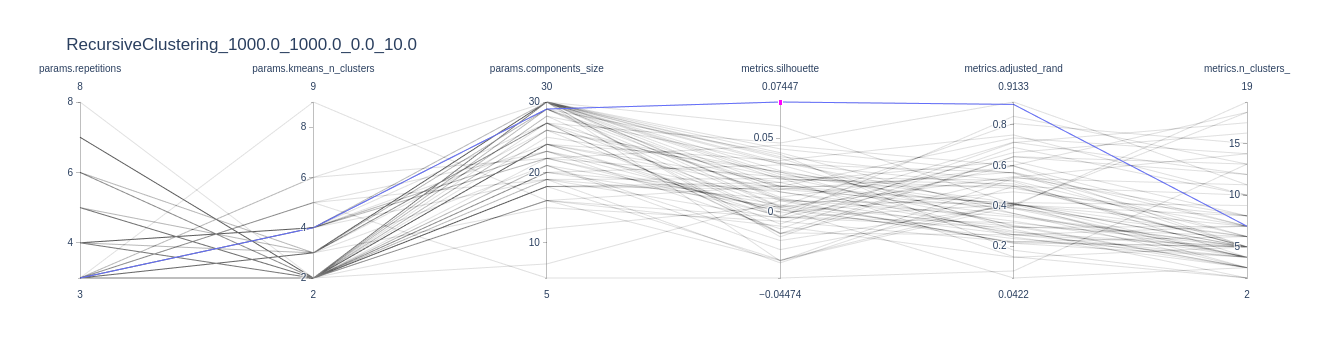

In [73]:
parent_run_id = '908bb1e1d08543f3b44bdcd87e325e37'
parent_run = parent_runs.loc[parent_runs['tags.parent_run_id']==parent_run_id]
model_name = parent_run['params.model_nickname'].values[0]
n_samples = parent_run['params.n_samples'].values[0]
n_informative = parent_run['params.n_informative'].values[0]
n_random = parent_run['params.n_random'].values[0]
class_sep = parent_run['params.class_sep'].values[0]
fig_title = f'{model_name}_{n_samples}_{n_informative}_{n_random}_{class_sep}'
df = runs.loc[runs['tags.parent_run_id']==parent_run_id]
df = df.loc[df['metrics.n_clusters_'] < 20]
fig = px.parallel_coordinates(df, dimensions=dimensions_dict[model_name], width=None, height=500, title=fig_title)
fig.show()

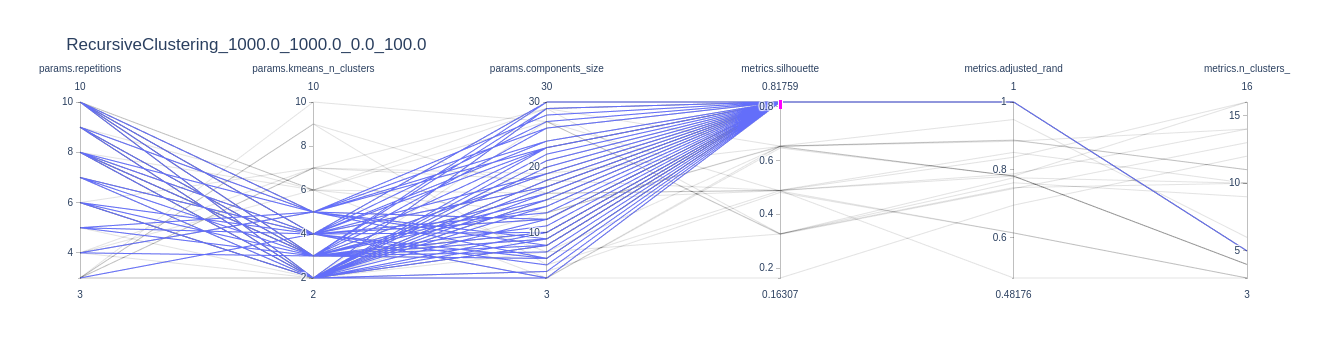

In [74]:
parent_run_id = '961c06819bea4b90b672e6d5ad66a4f3'
parent_run = parent_runs.loc[parent_runs['tags.parent_run_id']==parent_run_id]
model_name = parent_run['params.model_nickname'].values[0]
n_samples = parent_run['params.n_samples'].values[0]
n_informative = parent_run['params.n_informative'].values[0]
n_random = parent_run['params.n_random'].values[0]
class_sep = parent_run['params.class_sep'].values[0]
fig_title = f'{model_name}_{n_samples}_{n_informative}_{n_random}_{class_sep}'
df = runs.loc[runs['tags.parent_run_id']==parent_run_id]
df = df.loc[df['metrics.n_clusters_'] < 20]
fig = px.parallel_coordinates(df, dimensions=dimensions_dict[model_name], width=None, height=500, title=fig_title)
fig.show()

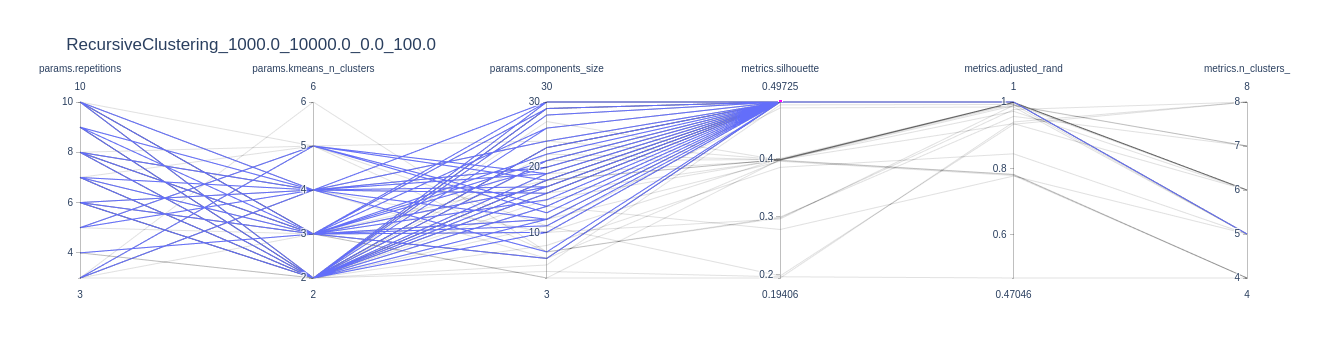

In [80]:
parent_run_id = 'f2e81dab9d0f4b1b8aeb333e01b24899'
parent_run = parent_runs.loc[parent_runs['tags.parent_run_id']==parent_run_id]
model_name = parent_run['params.model_nickname'].values[0]
n_samples = parent_run['params.n_samples'].values[0]
n_informative = parent_run['params.n_informative'].values[0]
n_random = parent_run['params.n_random'].values[0]
class_sep = parent_run['params.class_sep'].values[0]
fig_title = f'{model_name}_{n_samples}_{n_informative}_{n_random}_{class_sep}'
df = runs.loc[runs['tags.parent_run_id']==parent_run_id]
df = df.loc[df['metrics.n_clusters_'] < 10]
fig = px.parallel_coordinates(df, dimensions=dimensions_dict[model_name], width=None, height=500, title=fig_title)
fig.show()